Optimal Parameters: [2, 12, 0.1, 1, 1]
Minimum Cost: 1.5023482046909002


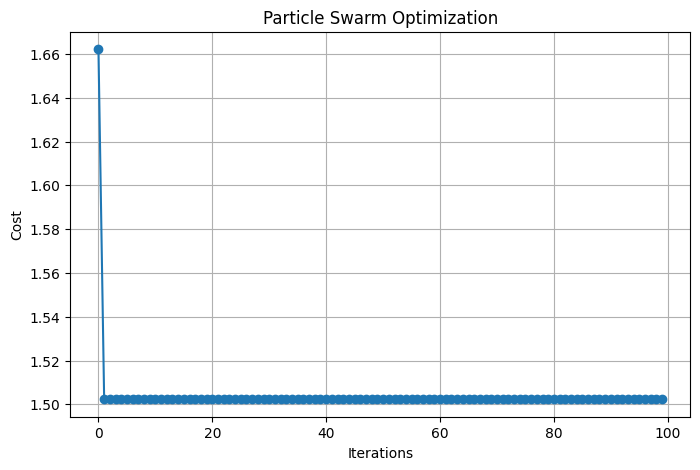

In [4]:
import random
import math
import matplotlib.pyplot as plt

# Define the complex cost function
def modified_cost_function(D, F, Q, SM, WD):
    # Coefficients
    a1 = 0.5  # Weight for irrigation duration
    a2 = 0.3  # Weight for irrigation frequency
    a3 = 0.2  # Weight for flow rate
    a4 = 0.4  # Weight for soil moisture
    a5 = 0.6  # Weight for weather data

    # Define constraints
    min_duration = 2  # Minimum allowable irrigation duration (hours)
    max_duration = 8  # Maximum allowable irrigation duration (hours)
    min_frequency = 12  # Minimum allowable irrigation frequency (hours)
    max_frequency = 36  # Maximum allowable irrigation frequency (hours)
    max_flow_rate = 2.0  # Maximum allowable flow rate (L/s)

    # Calculate cost components
    # Change the term related to D to linear
    cost_duration = a1 * (D / max_duration)  # Penalize long durations
    cost_frequency = a2 * math.exp((F - min_frequency) / (max_frequency - min_frequency))  # Penalize low frequency
    cost_flow_rate = a3 * math.exp((Q - max_flow_rate) / max_flow_rate)  # Penalize high flow rate
    # Change the term related to SM to exponential
    cost_soil_moisture = a4 * math.exp(1 - SM)  # Penalize dry soil
    # Change the term related to WD to exponential
    cost_weather_data = a5 * math.exp(1 - WD)  # Penalize unfavorable weather

    # Calculate the total cost
    total_cost = cost_duration + cost_frequency + cost_flow_rate + cost_soil_moisture + cost_weather_data

    return total_cost

# Particle Swarm Optimization algorithm for optimization with plotting
def particle_swarm_optimization_with_plot(iterations, population_size, lower_bounds, upper_bounds, inertia_weight, cognitive_weight, social_weight):
    # Initialize the population
    population = [[random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)] for _ in range(population_size)]

    # Initialize velocities
    velocities = [[0] * len(lower_bounds) for _ in range(population_size)]

    # Initialize personal best positions and costs
    personal_best_positions = population.copy()
    personal_best_costs = [modified_cost_function(*individual) for individual in population]

    # Find the global best position and cost
    global_best_index = personal_best_costs.index(min(personal_best_costs))
    global_best_position = personal_best_positions[global_best_index]
    global_best_cost = personal_best_costs[global_best_index]

    # Lists to store optimization progress for plotting
    iteration_list = []
    cost_list = []

    for iteration in range(iterations):
        for i in range(population_size):
            for j in range(len(lower_bounds)):
                # Update velocity
                cognitive_term = cognitive_weight * random.random() * (personal_best_positions[i][j] - population[i][j])
                social_term = social_weight * random.random() * (global_best_position[j] - population[i][j])
                velocities[i][j] = inertia_weight * velocities[i][j] + cognitive_term + social_term

                # Update position
                population[i][j] += velocities[i][j]

                # Clip to the search space bounds
                population[i][j] = max(min(population[i][j], upper_bounds[j]), lower_bounds[j])

            # Calculate the cost for the updated position
            cost = modified_cost_function(*population[i])

            # Update personal best if needed
            if cost < personal_best_costs[i]:
                personal_best_positions[i] = population[i].copy()
                personal_best_costs[i] = cost

                # Update global best if needed
                if cost < global_best_cost:
                    global_best_position = personal_best_positions[i].copy()
                    global_best_cost = cost

        # Store progress data for plotting
        iteration_list.append(iteration)
        cost_list.append(global_best_cost)

    return global_best_position, global_best_cost, iteration_list, cost_list

# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed

# PSO parameters
iterations = 100
population_size = 50
inertia_weight = 0.5
cognitive_weight = 1.5
social_weight = 1.5

# Run the Particle Swarm Optimization algorithm to find the optimal parameters and plot the progress
best_params, min_cost, iterations, costs = particle_swarm_optimization_with_plot(iterations, population_size, lower_bounds, upper_bounds, inertia_weight, cognitive_weight, social_weight)

# Output the results
print("Optimal Parameters:", best_params)
print("Minimum Cost:", min_cost)

# Plot optimization progress
plt.figure(figsize=(8, 5))
plt.plot(iterations, costs, marker='o', linestyle='-')
plt.title("Particle Swarm Optimization")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()